# Medical Insurance Cost Prediction using Regression Analysis

**Project Overview:**
This notebook demonstrates a complete machine learning workflow for predicting medical insurance costs based on personal characteristics. We'll use multiple linear regression to understand the relationship between factors like age, BMI, smoking status, and insurance charges.

## 1. Importing Libraries
We start by importing all the necessary Python libraries for data analysis, visualization, and machine learning.

In [1]:
# Core libraries for data manipulation and numerical operations
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Set seaborn style for better-looking plots

# Statistical modeling library
import statsmodels.api as sm

## 2. Loading and Initial Data Exploration
Let's load our dataset and take a first look at the data structure.

In [2]:
# Load the insurance dataset
# This dataset contains medical insurance information for 1,338 individuals
data = pd.read_csv("insurance.csv")

# Display the first 5 rows to understand our data structure
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Get comprehensive statistics about our dataset
# This shows us the distribution of numerical and categorical variables
data.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## 3. Data Quality Assessment
Before proceeding with analysis, let's check for any missing values in our dataset.

In [4]:
# Check for missing values in each column
# Missing data can significantly impact our model's performance
missing_values = data.isnull().sum()
print("Missing values per column:")
missing_values

Missing values per column:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 4. Exploratory Data Analysis (EDA)
Let's examine the distribution of our variables through visualizations.

### 4.1 Distribution of Insurance Charges (Target Variable)
Understanding the distribution of our target variable is crucial for model selection.

<Figure size 1000x600 with 0 Axes>

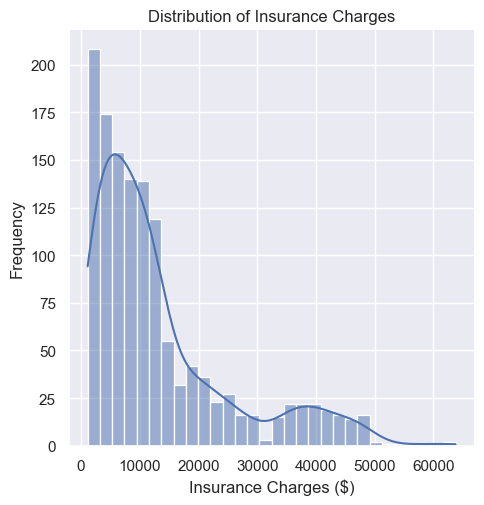

In [5]:
# Plot the distribution of insurance charges
# This shows us the shape of our target variable's distribution
plt.figure(figsize=(10, 6))
sns.displot(data['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Insurance Charges ($)')
plt.ylabel('Frequency')
plt.show()

# Note: The distribution appears right-skewed, which might require transformation

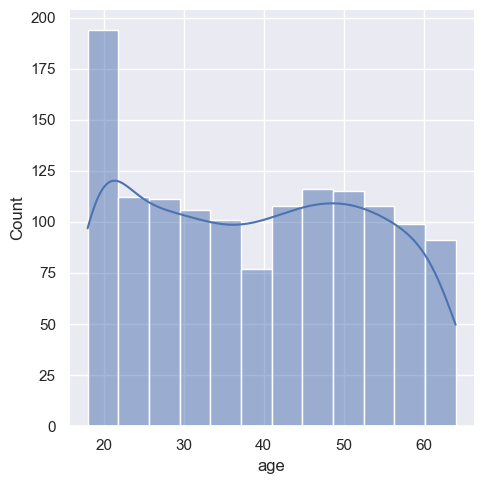

In [6]:
sns.displot(data['age'], kde = 'True')

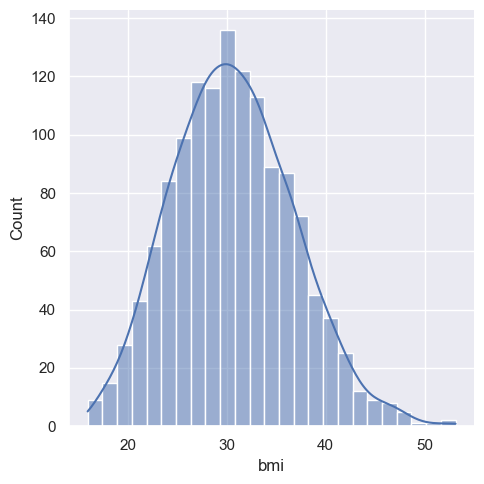

In [7]:
sns.displot(data['bmi'], kde = 'True')

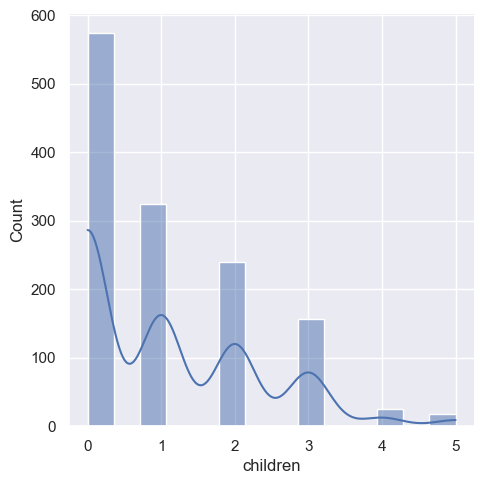

In [8]:
sns.displot(data['children'], kde = 'True')

### Checking OLS assumptions

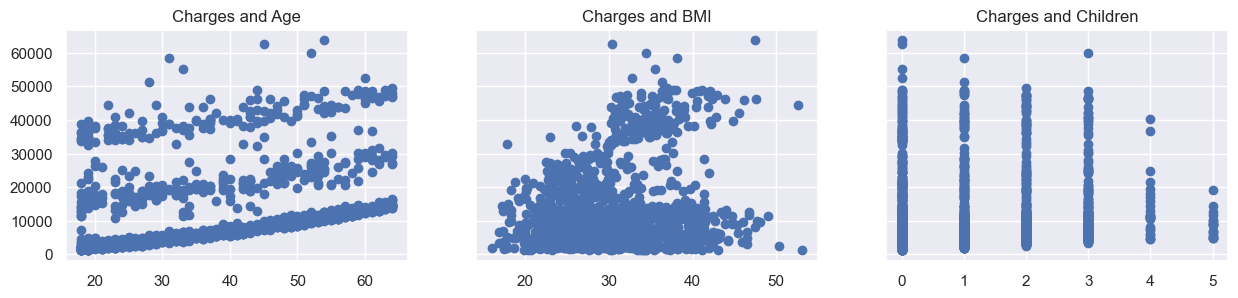

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data['age'],data['charges'])
ax1.set_title('Charges and Age')
ax2.scatter(data['bmi'],data['charges'])
ax2.set_title('Charges and BMI')
ax3.scatter(data['children'],data['charges'])
ax3.set_title('Charges and Children')

plt.show()

In [10]:
data['log_charges'] = np.log(data['charges'])

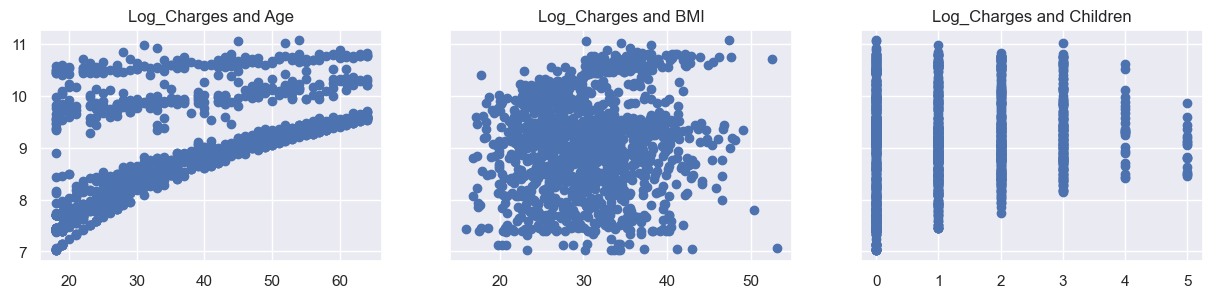

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data['age'],data['log_charges'])
ax1.set_title('Log_Charges and Age')
ax2.scatter(data['bmi'],data['log_charges'])
ax2.set_title('Log_Charges and BMI')
ax3.scatter(data['children'],data['log_charges'])
ax3.set_title('Log_Charges and Children')

plt.show()

In [12]:
data.drop(['charges'], axis = 1)

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268661
1334,18,female,31.920,0,no,northeast,7.698927
1335,18,female,36.850,0,no,southeast,7.396233
1336,21,female,25.800,0,no,southwest,7.604867


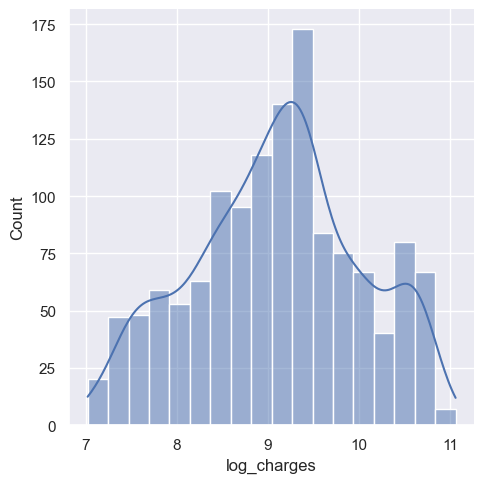

In [13]:
sns.displot(data['log_charges'], kde = 'True')

### Multicolinearity

In [14]:
data.drop(['charges'], axis = 1)

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268661
1334,18,female,31.920,0,no,northeast,7.698927
1335,18,female,36.850,0,no,southeast,7.396233
1336,21,female,25.800,0,no,southwest,7.604867


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['age','bmi','children']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,7.536550,age
1,7.846515,bmi
2,1.796637,children


### Creating Dummy Variables

In [16]:
data_dummies = pd.get_dummies(data, drop_first = True)
cols_to_convert = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
data_dummies[cols_to_convert] = data_dummies[cols_to_convert].astype(int)

### Rearrange variables

In [17]:
data_dummies.columns.values

array(['age', 'bmi', 'children', 'charges', 'log_charges', 'sex_male',
       'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [18]:
cols = ['log_charges', 'age', 'bmi', 'children', 'sex_male',
       'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest']

In [19]:
data_preprocessed = data_dummies[cols]
data_preprocessed

,log_charges,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,9.734176,19,27.900,0,0,1,0,0,1
1,7.453302,18,33.770,1,1,0,0,1,0
2,8.400538,28,33.000,3,1,0,0,1,0
3,9.998092,33,22.705,0,1,0,1,0,0
4,8.260197,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,9.268661,50,30.970,3,1,0,1,0,0
1334,7.698927,18,31.920,0,0,0,0,0,0
1335,7.396233,18,36.850,0,0,0,0,1,0
1336,7.604867,21,25.800,0,0,0,0,0,1


## Linear Regression Model

### Declare input and target variables

In [20]:
target = data_preprocessed['log_charges']
inputs = data_preprocessed.drop(['log_charges'], axis = 1)

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

### Create the Regression

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
y_hat = reg.predict(x_train)

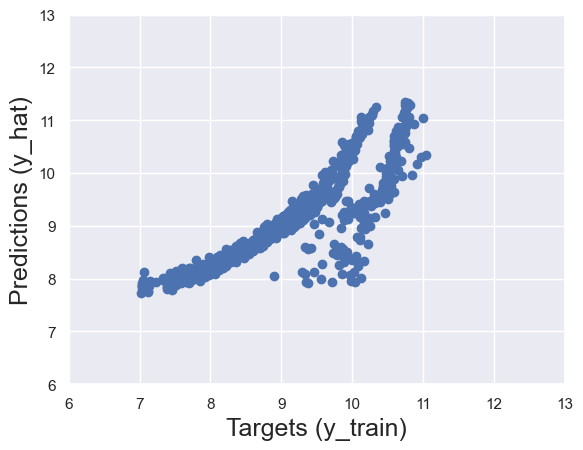

In [24]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

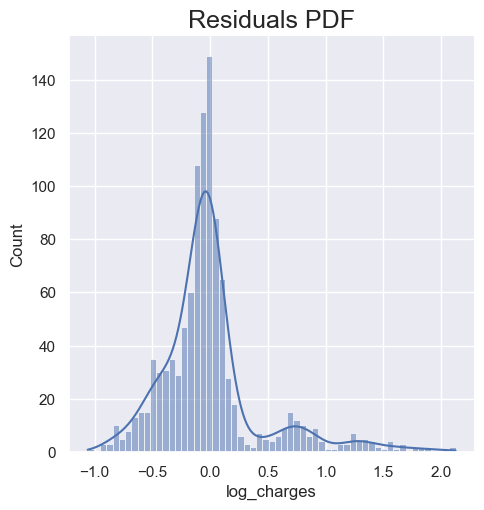

In [25]:
sns.displot(y_train - y_hat, kde = 'True')

plt.title("Residuals PDF", size=18)

In [26]:
reg.score(x_train,y_train)

0.7640353044847054

### Finding Weights and Bias

In [27]:
reg.coef_

array([ 0.03439156,  0.01285782,  0.10046157, -0.06296104,  1.59089924,
       -0.0740242 , -0.18066393, -0.14937018])

In [28]:
reg.intercept_

np.float64(7.060745252158308)

In [29]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,age,0.034392
1,bmi,0.012858
2,children,0.100462
3,sex_male,-0.062961
4,smoker_yes,1.590899
5,region_northwest,-0.074024
6,region_southeast,-0.180664
7,region_southwest,-0.149370


### Testing

In [30]:
y_hat_test = reg.predict(x_test)

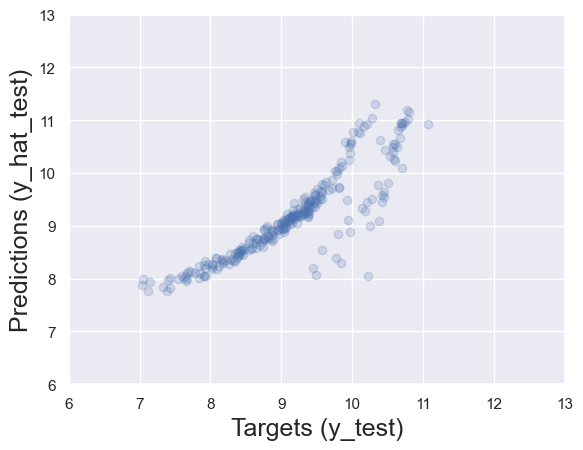

In [31]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [32]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,13438.964145
1,3146.658271
2,3151.920563
3,9036.264975
4,14451.020284


In [33]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,13438.964145,NaN
1,3146.658271,NaN
2,3151.920563,NaN
3,9036.264975,NaN
4,14451.020284,NaN
...,...,...
263,10156.092183,NaN
264,72074.327778,20462.99766
265,38725.169948,NaN
266,4136.379471,NaN


In [34]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.578440
1     7.591651
2     7.904376
3     9.028154
4    10.426744
Name: log_charges, dtype: float64

In [35]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,13438.964145,14449.85440
1,3146.658271,1981.58190
2,3151.920563,2709.11190
3,9036.264975,8334.45755
4,14451.020284,33750.29180
...,...,...
263,10156.092183,8733.22925
264,72074.327778,47496.49445
265,38725.169948,21677.28345
266,4136.379471,4185.09790


In [36]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [37]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,13438.964145,14449.85440,1010.890255,6.995851
1,3146.658271,1981.58190,-1165.076371,58.795267
2,3151.920563,2709.11190,-442.808663,16.345160
3,9036.264975,8334.45755,-701.807425,8.420553
4,14451.020284,33750.29180,19299.271516,57.182532
...,...,...,...,...
263,10156.092183,8733.22925,-1422.862933,16.292518
264,72074.327778,47496.49445,-24577.833328,51.746626
265,38725.169948,21677.28345,-17047.886498,78.644017
266,4136.379471,4185.09790,48.718429,1.164093


In [38]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,268.000000,268.000000,268.000000,268.000000
mean,13960.625974,13312.818747,-647.807226,24.711924
std,14759.734578,11769.704586,8397.401232,30.078359
min,2351.637674,1137.011000,-50856.719340,0.020749
25%,5130.308043,5234.338375,-1100.438578,4.906075
50%,9022.240062,9526.937700,-344.116938,11.642415
75%,13518.736857,15977.416237,561.468990,32.693127
max,81041.656040,63770.428010,24560.826231,168.483770
